## Data Import

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#rotten tomatoes databases
rt_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
rt_movies = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')

#imdb databases
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_name = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')

# Box Office Mojo database
gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

#the-numbers Database
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

#TheMovieDB.org
tmdb = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')


In [259]:
#Creating a dictionary of the databases will allow for performing functions on multiple databases simultaneously
# useful for printing .head() .describe() .duplicated() .isna().sum() etc.
dfs = {'tmdb': tmdb, 'budgets': budgets, 'gross': gross, \
       'principals':principals, 'crew':crew, 'akas':akas,\
       'imdb_name': imdb_name, 'imdb_basics': imdb_basics,\
       'imdb_ratings': imdb_ratings, 'rt_movies': rt_movies,\
       'rt_reviews':rt_reviews}

for key,value in dfs.items():
    value.name = key

def df_info(df):
    ''' Takes in a pandas dataframe (df) and returns len(df), df.isna()sum, df.shape, df.info(), df.duplicated().sum(),  '''
    print('#################################################################################### \n')
    name =[x for x in globals() if globals()[x] is df][0]
    print('{} Database'.format(name))
    print('\n')
    print('The length of this dataframe is {}'.format(len(df)))
    print('Database shape {}'.format(df.shape))
    print('\n')
    print(df.info())
    display(df.head())
    print('Number of Null values in {}'.format((name).capitalize()))
    display(df.isna().sum())
    print('The Number of duplicated rows in {} is {}'.format(name, df.duplicated().sum()))
    print('#################################################################################### \n')
    


## Data Preview

It would now be useful to preview each dataset, this will determine which datasets I will proceed with and ones which I would recommend revisiting for further insights

In [260]:
df_info(imdb_basics)

#################################################################################### 

imdb_basics Database


The length of this dataframe is 146144
Database shape (146144, 7)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.9+ MB
None


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Number of Null values in Imdb_basics


tconst                 0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

The Number of duplicated rows in imdb_basics is 0
#################################################################################### 



This is a large dataset of over 146,000 movies, the "tconst" column will prove useful when merging and joining with other IMDB databases. This dataset will be used in further analysis.

Original title seems superfluous and has 21 null values out of 146144 entries. This column could be dropped and we will work with the primary_title column

runtime_minutes has a high % of null values - we may need to impute or remove these rows entirely, imputing in such a high number of rows could lead to erroneous conclusions being drawn from analysis

#### Cleaning recommendations

* Remove 'original_title' column
* Impute values into 'runtime_minutes' rows with null values or remove rows altogether
* Remove rows with null values in 'genres'


In [82]:
df_info(akas)

#################################################################################### 

akas Database


The length of this dataframe is 331703
Database shape (331703, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


Number of Null values in Akas


title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

The Number of duplicated rows in akas is 0
#################################################################################### 



Messy dataset that doesn't appear to contain anything useful as first glance. The regions column could potentially be used to correlate 'number of regions' vs profit or return on investment but even the 'region' column contains a high number of null values. For now this dataset won't be used.

In [83]:
df_info(crew)

#################################################################################### 

crew Database


The length of this dataframe is 146144
Database shape (146144, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB
None


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


Number of Null values in Crew


tconst           0
directors     5727
writers      35883
dtype: int64

The Number of duplicated rows in crew is 0
#################################################################################### 



This dataframe is the same length as imdb_basics and also contains 'tconst'. The writers contains a high number of null values, I will not drop these rows because we will lose valuable information in the 'directors' column. Instead I will keep writers and see how useful it proves to be later on i.e how many of the more successful movies have missing values in 'writers' column and can it be used to draw insights.

#### Cleaning Recommendations

* Merge with imdb_basics
* drop rows with null values in 'directors'

In [84]:
df_info(principals)

#################################################################################### 

principals Database


The length of this dataframe is 1028186
Database shape (1028186, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Number of Null values in Principals


tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

The Number of duplicated rows in principals is 0
#################################################################################### 



Over 1million entries in this database, each movie ('tconst') has multiple entries for each individual 'nconst' which is the unique code given to individuals. We will need to see if there is a way to match up 'nconst' with a name - nconst alone isn't very useful. Job and characters columns are not required nor is ordering. 

#### Cleaning recommendations

* Drop 'ordering' , 'job' and 'characters' columns

In [85]:
df_info(imdb_ratings)

#################################################################################### 

imdb_ratings Database


The length of this dataframe is 73856
Database shape (73856, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Number of Null values in Imdb_ratings


tconst           0
averagerating    0
numvotes         0
dtype: int64

The Number of duplicated rows in imdb_ratings is 0
#################################################################################### 



This will be a useful dataset when it comes to looking for a correlation between 'averagerating' and profit or ROI. It is noted this dataframe is shorter than other IMDB datasets, therefore any analysis involving average rating will be on a lower number of movies. 

#### Cleaning recommendations
* 'averagerating' will be influenced by 'numvotes' - insights drawn from 'averagerating' that have low number of votes may not be too valuable. It may be worth applying a filter (minimum number of votes) to this dataset.

In [86]:
df_info(imdb_name)

#################################################################################### 

imdb_name Database


The length of this dataframe is 606648
Database shape (606648, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


Number of Null values in Imdb_name


nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

The Number of duplicated rows in imdb_name is 0
#################################################################################### 



This dataset will be useful for matching up 'nconst' with a name in the 'principals' dataframe. 

#### Cleaning recommendations
* Drop 'birth_year' and 'death_year' columns
* 'primary_profession' appears to contain the same information as 'category' in 'principals' dataframe. This could be dropped.
* merge with principals dataframe

In [87]:
df_info(rt_movies)

#################################################################################### 

rt_movies Database


The length of this dataframe is 17712
Database shape (17712, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_d

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


Number of Null values in Rt_movies


rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

The Number of duplicated rows in rt_movies is 0
#################################################################################### 



22 columns - not all of which will be required in this analysis, they may be useful for future work. Alot of this information is already been observed in IMDB dataframes, while it is useful to have multiple data sources in order to validate data accuracy and highlight discrepancies, that will not be conducted within the timeframe of this project. Instead this dataframe will be used for its unique data - reviews. 

#### Cleaning Recommendations 
* Drop 'critic_consensus' , 'movie_info' , 'tomatometer_top_critics_count'	'tomatometer_fresh_critics_count'	  'tomatometer_rotten_critics_count' , 'streaming_release_date'
* Drop rows with null values in 'tomatometer_rating' , 'tomatometer_status', 'tomatometer_count'
* fill na of 'audience_status' , 'audience_rating' , 'audience_count' with median values


In [88]:
df_info(rt_reviews)

#################################################################################### 

rt_reviews Database


The length of this dataframe is 1130017
Database shape (1130017, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB
None


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


Number of Null values in Rt_reviews


rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

The Number of duplicated rows in rt_reviews is 119471
#################################################################################### 



This looks to be just individual review data, hence multiple entries for the same 'rotten_tomatoes_link'. 'rt_movies' dataframe already consolidates alot of review data that will be useful for this project. Further work could add granularity to the link between review ratings and profit or ROI by analysing any potential link between specific reviewers scores and a movies' success. For this project, this dataframe will not be used.

In [89]:
df_info(tmdb)

#################################################################################### 

tmdb Database


The length of this dataframe is 26517
Database shape (26517, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB
None


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Number of Null values in Tmdb


genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The Number of duplicated rows in tmdb is 1020
#################################################################################### 



This dataframe could be valuable to cross check conclusions made using other dataframes as it contains similar information but from yet another source. 

#### Cleaning Recommendations
* drop 'genre_ids', 'id', 'original_language', 'original_title'

In [90]:
df_info(budgets)

#################################################################################### 

budgets Database


The length of this dataframe is 5782
Database shape (5782, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Number of Null values in Budgets


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The Number of duplicated rows in budgets is 0
#################################################################################### 



Valuable dataframe, although short at 5782 entries. This will be used to infer patterns between profit / ROI / budgets. 

#### Cleaning Recommendations
* drop 'id' column
* convert 'production_budget', 'domestic_gross', 'worldwide_gross' to float - remove commas and dollar signs.
* convert 'release_date' to datetime - extract month and year and form separate columns for both then remove 'release_date'

In [91]:
df_info(gross)

#################################################################################### 

gross Database


The length of this dataframe is 3387
Database shape (3387, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Number of Null values in Gross


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The Number of duplicated rows in gross is 0
#################################################################################### 



Dataframe offers similar information as 'budgets' dataframe however is shorter. It does add studio information which could prove useful when evaluating what the competition is doing.

## Data Preparation

The following dataframes will form the bulk of this project:
* budgets
* imdb_name, imdb_basics, imdb_ratings, imdb_principals
* rt_movies

### Budgets

Starting with 'budgets', first lets drop the 'id' column

In [ ]:
budgets.drop('id', axis=1, inplace=True)

Create a function for cleaning up columns that should be a number - remove dollar signs and commas and convert to float.

In [96]:
def convert_col_float(df, col):
    '''takes in a dataframe and a column name within the dataframe, removes commas and dollar signs and returns as a float'''
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].astype(float)
    return df[col]

In [97]:
convert_col_float(budgets, 'production_budget')
convert_col_float(budgets, 'domestic_gross')
convert_col_float(budgets, 'worldwide_gross')
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Let's now convert the 'release_date' column to something useable.

In [98]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


I can foresee both year and month data being a useful parameter for group, create a column for both by extracting the information from 'release_date'

In [101]:
budgets['month'] = budgets['release_date'].dt.month
budgets['month'] = budgets['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],\
                                           ['January', 'February', 'March', 'April',\
                                           'May', 'June', 'July', 'August', 'September',\
                                           'October', 'November', 'December'])
budgets['year'] = budgets['release_date'].dt.year
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,December,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,2011
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,June,2019
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,December,2017


I will be using this dataframe to analyse the relationship between budgets and profit, in order to do this I will need to create a profit column. A quick google tells me that in 'The Numbers' database, the 'worldwide_gross' is inclusive of the 'domestic_gross'. The profit will therefore simply be the worldwide_gross - production_budget. This will be easier to view when the profit is in $ million.

The return on investment (roi) column is the ratio between budget and profit, in this instance it will be the profit column divided the budget column i.e for every dollar you invest, how many dollars profit will you receive?

In [102]:
#convert 'production_budget' , 'domestic_gross' , 'worldwide_gross' to millions units.

# budgets['production_budget'] = budgets['production_budget'] / 1000000
# budgets['domestic_gross'] = budgets['domestic_gross'] / 1000000
# budgets['worldwide_gross'] = budgets['worldwide_gross'] / 1000000

# commented out this cell as to not accidentally run again

In [103]:
#creating profit and roi columns

budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']
budgets['roi'] = budgets['profit'] / budgets['production_budget']


In [104]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi
0,2009-12-18,Avatar,425.0,760.507625,2776.345279,December,2009,2351.345279,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,May,2011,635.063875,1.546673
2,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,June,2019,-200.237650,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,May,2015,1072.413963,3.243841
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,December,2017,999.721747,3.153696


Using the .describe() method, check the distribution of values in each column, this is useful for flagging up potential issues

In [106]:
budgets.describe()

,production_budget,domestic_gross,worldwide_gross,year,profit,roi
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,31.587757,41.873327,91.487461,2003.967139,59.899704,3.800161
std,41.812077,68.240597,174.719969,12.724386,146.088881,29.530282
min,0.001100,0.000000,0.000000,1915.000000,-200.237650,-1.000000
25%,5.000000,1.429534,4.125415,2000.000000,-2.189071,-0.507704
50%,17.000000,17.225945,27.984448,2007.000000,8.550286,0.708310
75%,40.000000,52.348662,97.645837,2012.000000,60.968502,2.758346
max,425.000000,936.662225,2776.345279,2020.000000,2351.345279,1799.000000


The first thing that stands out here is the minimum values in both the domestic and worldwide gross columns. There may be a reason for why a movie would have not earned any money as of yet - the main one being it might not have been released yet. Either way, a movie with zero domestic gross and worldwide gross is extremely unlikely and likely erroneous and I will remove them from this analysis.

In [107]:
# check how many rows are impacted

len(budgets[(budgets['domestic_gross']==0) & (budgets['worldwide_gross']==0)])

367

In [108]:
# remove the rows from the database

budgets = budgets[(budgets['domestic_gross']!=0) & (budgets['worldwide_gross']!=0)]

The budgets dataframe is now ready for some preliminary analysis.

### rt_movies

* Drop 'critic_consensus' , 'movie_info' , 'tomatometer_top_critics_count'	'tomatometer_fresh_critics_count'	  'tomatometer_rotten_critics_count' , 'streaming_release_date'
* Drop rows with null values in 'tomatometer_rating' , 'tomatometer_status', 'tomatometer_count'
* fill na of 'audience_status' , 'audience_rating' , 'audience_count' with median values

In [111]:
# as per bullet point one, dropping the neccessary columns

cols_to_remove= ['critics_consensus' , 'movie_info' , 'tomatometer_top_critics_count',\
 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',\
 'streaming_release_date']

rt_movies.drop(cols_to_remove, axis=1, inplace=True)

In [112]:
rt_movies.head()

,rotten_tomatoes_link,movie_title,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0
1,m/0878835,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0
2,m/10,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0


In [116]:
# removing rows that have null values in the following 3 columns

rt_movies.dropna(subset=['tomatometer_rating' , 'tomatometer_status', 'tomatometer_count'], inplace=True)

In [117]:
df_info(rt_movies)

#################################################################################### 

rt_movies Database


The length of this dataframe is 17668
Database shape (17668, 16)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17668 entries, 0 to 17711
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rotten_tomatoes_link   17668 non-null  object 
 1   movie_title            17668 non-null  object 
 2   content_rating         17668 non-null  object 
 3   genres                 17649 non-null  object 
 4   directors              17475 non-null  object 
 5   authors                16134 non-null  object 
 6   actors                 17316 non-null  object 
 7   original_release_date  16514 non-null  object 
 8   runtime                17384 non-null  float64
 9   production_company     17175 non-null  object 
 10  tomatometer_status     17668 non-null  object 
 11  tomatometer_rating     17668 non-nu

,rotten_tomatoes_link,movie_title,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0
1,m/0878835,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0
2,m/10,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0


Number of Null values in Rt_movies


rotten_tomatoes_link        0
movie_title                 0
content_rating              0
genres                     19
directors                 193
authors                  1534
actors                    352
original_release_date    1154
runtime                   284
production_company        493
tomatometer_status          0
tomatometer_rating          0
tomatometer_count           0
audience_status           413
audience_rating           261
audience_count            262
dtype: int64

The Number of duplicated rows in rt_movies is 0
#################################################################################### 



In [122]:
# create a function for filling null values in columns with their median values

def median_fill(df, col):
    df[col] = df[col].fillna((df[col].median()))


In [124]:
#filling columns with the median value of the column
median_fill(rt_movies, 'audience_rating')
median_fill(rt_movies, 'audience_count')

In [131]:
# replacing the audience status column with the conditions taken from Rotten Tomatoes Website.
conditions = [(rt_movies['audience_rating'] < 60), (rt_movies['audience_rating'] >= 60)]

# create a list of the values we want to assign for each condition
values = ['Spilled', 'Upright']

# create a new column and use np.select to assign values to it using our lists as arguments
rt_movies['audience_rating_new'] = np.select(conditions, values)

# dropping original column with missing values
rt_movies.drop(['audience_status'], axis=1, inplace=True)

In [132]:
rt_movies.head()

,rotten_tomatoes_link,movie_title,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,audience_rating_new
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,Rotten,49.0,149.0,53.0,254421.0,Spilled
1,m/0878835,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,64.0,11574.0,Upright
2,m/10,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,122.0,Waner Bros.,Fresh,67.0,24.0,53.0,14684.0,Spilled
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,97.0,105386.0,Upright
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,Fresh,89.0,27.0,74.0,68918.0,Upright


Although there are still some imperfections in this dataset, its use will be primarily for checking review ratings vs profit and roi, and the review columns and movie_title columns are complete for now. 

### imdb databases

#### imdb_name

* Drop 'birth_year' and 'death_year' columns
* 'primary_profession' appears to contain the same information as 'category' in 'principals' dataframe. This could be dropped.
* merge with principals dataframe


In [136]:
# dropping 'birth_year' , 'death_year' & 'primary_profession' columns

imdb_name.drop(['birth_year', 'death_year', 'primary_profession'], axis=1, inplace=True)

Now lets merge this dataframe with the prinicpals dataframe, its worth reminding ourselves the structure of both.

In [137]:
df_info(imdb_name)

#################################################################################### 

imdb_name Database


The length of this dataframe is 606648
Database shape (606648, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   nconst            606648 non-null  object
 1   primary_name      606648 non-null  object
 2   known_for_titles  576444 non-null  object
dtypes: object(3)
memory usage: 13.9+ MB
None


,nconst,primary_name,known_for_titles
0,nm0061671,Mary Ellen Bauder,"tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"tt0452644,tt0452692,tt3458030,tt2178256"


Number of Null values in Imdb_name


nconst                  0
primary_name            0
known_for_titles    30204
dtype: int64

The Number of duplicated rows in imdb_name is 0
#################################################################################### 



In [138]:
df_info(principals)

#################################################################################### 

principals Database


The length of this dataframe is 1028186
Database shape (1028186, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Number of Null values in Principals


tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

The Number of duplicated rows in principals is 0
#################################################################################### 



In [140]:
# merge the principals dataframe with the imdb_name dataframe using 'nconst'

principals_names = principals.merge(imdb_name, how='left', on='nconst')
principals_names.name = 'principals_names' # create name so it df_info function will run
df_info(principals_names)

#################################################################################### 

principals_names Database


The length of this dataframe is 1028186
Database shape (1028186, 8)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   tconst            1028186 non-null  object
 1   ordering          1028186 non-null  int64 
 2   nconst            1028186 non-null  object
 3   category          1028186 non-null  object
 4   job               177684 non-null   object
 5   characters        393360 non-null   object
 6   primary_name      1027912 non-null  object
 7   known_for_titles  997445 non-null   object
dtypes: int64(1), object(7)
memory usage: 70.6+ MB
None


,tconst,ordering,nconst,category,job,characters,primary_name,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,"tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,"tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,"tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,tt0323808


Number of Null values in Principals_names


tconst                   0
ordering                 0
nconst                   0
category                 0
job                 850502
characters          634826
primary_name           274
known_for_titles     30741
dtype: int64

The Number of duplicated rows in principals_names is 0
#################################################################################### 



As discussed in the previous sections, ordering, job and characters columns can be dropped, known_for_titles may prove useful, it will be kept for now. 

In [141]:
# drop columns as discussed
principals_names.drop(['job', 'characters', 'ordering'], axis=1, inplace=True)
principals_names.head()

,tconst,nconst,category,primary_name,known_for_titles
0,tt0111414,nm0246005,actor,Tommy Dysart,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,nm0398271,director,Frank Howson,"tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,nm3739909,producer,Barry Porter-Robinson,"tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,nm0059247,editor,Sean Barton,"tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,nm3579312,actress,Brittania Nicol,tt0323808


In [142]:
principals_names['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

This dataframe will prove useful when looking for the best talent to approach for this project

### imdb_basics

* drop the 'original_title' columns. 
* merge with the imdb_ratings dataframe
* Split the genres column 


In [143]:
df_info(imdb_basics)

#################################################################################### 

imdb_basics Database


The length of this dataframe is 146144
Database shape (146144, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Number of Null values in Imdb_basics


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The Number of duplicated rows in imdb_basics is 0
#################################################################################### 



In [144]:
# drop original title column
imdb_basics.drop(['original_title'], axis = 1, inplace = True)

In [147]:
#merge with ratings
imdb_basics = imdb_basics.merge(imdb_ratings, how='left', on='tconst')

In [148]:
imdb_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [150]:
imdb_basics.name = 'imdb_basics'
df_info(imdb_basics)

#################################################################################### 

imdb_basics Database


The length of this dataframe is 146144
Database shape (146144, 7)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB
None


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Number of Null values in Imdb_basics


tconst                 0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

The Number of duplicated rows in imdb_basics is 0
#################################################################################### 



In [151]:
imdb_basics.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


## Data Visualizations

What are the most successful movies of all time?

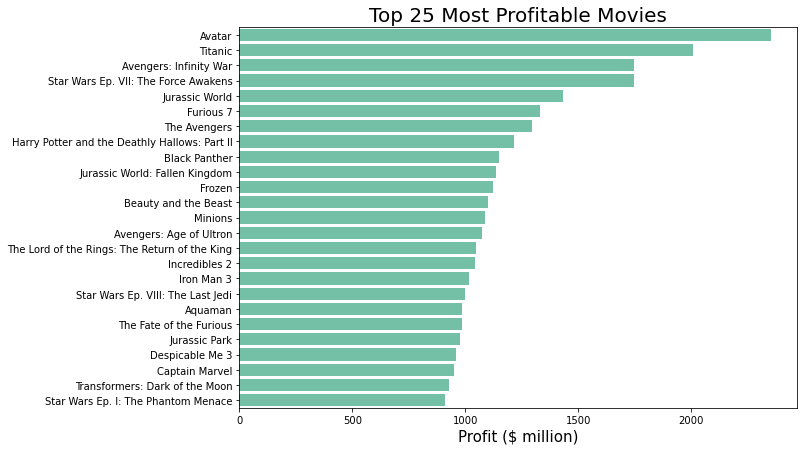

In [157]:
plt.figure(figsize = (10,7))
figure_1 = sns.barplot(y = 'movie', x = 'profit', data=budgets.sort_values('profit',ascending=False)[0:25],\
                       color = 'mediumaquamarine');
figure_1.set_title('Top 25 Most Profitable Movies', fontsize=20);
figure_1.set_ylabel('', fontsize=15)
figure_1.set_xlabel('Profit ($ million)', fontsize=15);

Is the competition becoming more fierce? Let's explore the number of movies being made through time

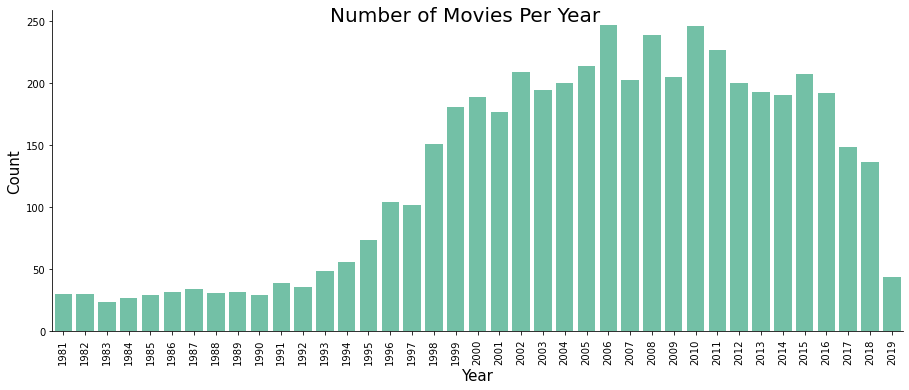

In [185]:
#plt.figure(figsize = (10,7));
figure_2 = sns.catplot(x = 'year', kind = 'count', data=budgets[budgets['year']>1980],\
                       color = 'mediumaquamarine', aspect = 2.5);
figure_2.set_xticklabels(rotation=90);
figure_2.set_xlabels('Year', fontsize=15);
figure_2.set_ylabels('Count', fontsize=15);
figure_2.fig.suptitle('Number of Movies Per Year', fontsize=20);

Looking at the 'budgets' dataframe it seems more movies are being made now than ever.Although this may not be a perfect dataset, it is likely that this plot does reflect the truth to some extent. This trend can be validated by cross checking against another database.

The business of making movies is more competitive than ever before, this is not considering streaming which is a different type of competitor - one that is keeping audiences away from theatres altogether! 

### Let's talk about Money
Everyone wanting to make movies, must mean the profits are great, right?

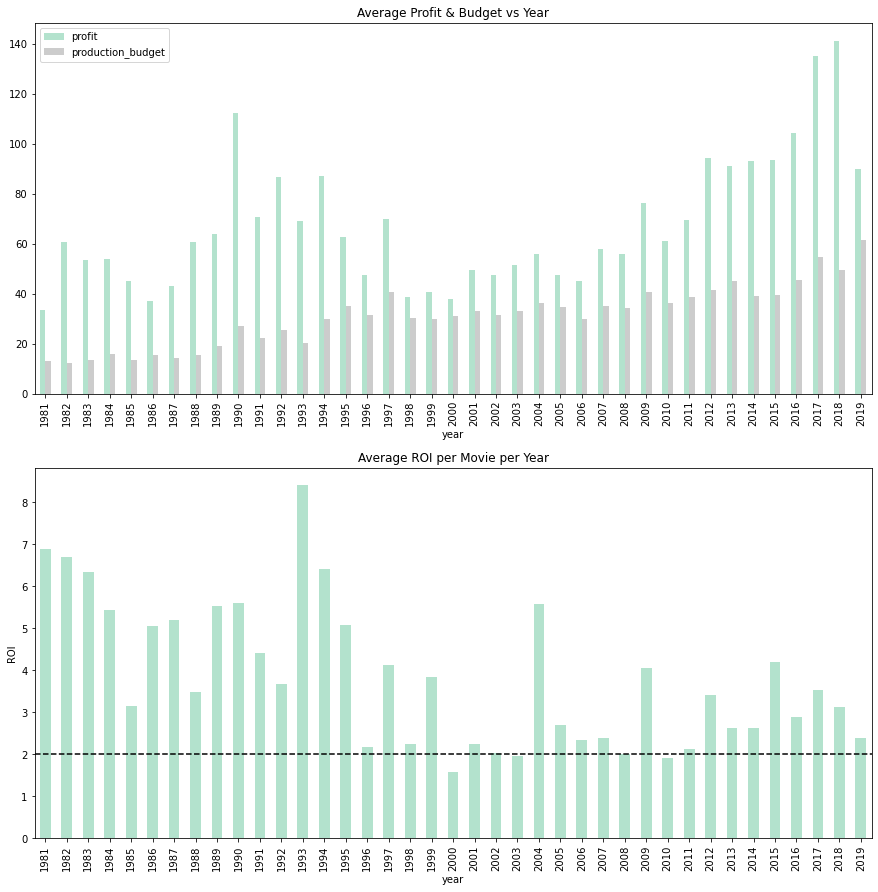

In [195]:
figure_3, axes = plt.subplots(2,1)

budgets[budgets['year']>1980].groupby(budgets['year'])[['profit', 'production_budget']].mean().plot.bar(figsize=(15,15), ax = axes[0], colormap='Pastel2')
budgets[budgets['year']>1980].groupby(budgets['year'])['roi'].mean().plot.bar(colormap='Pastel2',ax = axes[1])
axes[0].set_title('Average Profit & Budget vs Year')
axes[1].set_title('Average ROI per Movie per Year')
axes[1].set_ylabel('ROI');
axes[1].axline(xy1= (1981, 2), slope=0, color='black', linestyle='--');

So yes, profits are increasing with time in absolute terms but so are the production budgets. This means when you compare Return on Investment (ROI) through the years it has actually decreased compared to the hey days of the 1990s. 

Making movies however is still a profitable business, with an ROI of between 2-3 being the norm in recent years.

#### Budget vs Profit vs ROI 

How much can Microsoft expect to spend per movie? The more you spend the more you make?

(-10.0, 500.0)

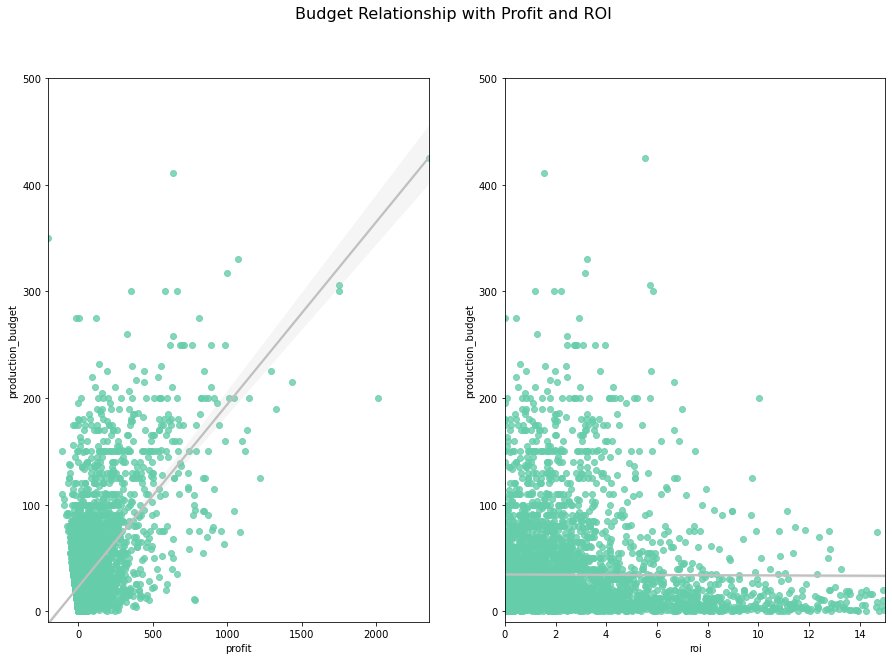

In [198]:
figure_4, axes = plt.subplots(1,2, figsize=(15,10))
figure_4.suptitle('Budget Relationship with Profit and ROI', fontsize=16)
axes[0] = sns.regplot(data=budgets, x='profit', y='production_budget', scatter_kws={'color': 'mediumaquamarine'}, line_kws={'color': 'silver'}, ax=axes[0])
axes[0].set_ylim(-10,500)
axes[1] = sns.regplot(data=budgets, x='roi', y='production_budget', scatter_kws={'color': 'mediumaquamarine'}, line_kws={'color': 'silver'}, ax=axes[1])
axes[1].set_xlim(0,15)
axes[1].set_ylim(-10,500)
axes[1].set_ylim(-10,500)

In [203]:
budgets.corr()['production_budget']

production_budget    1.000000
domestic_gross       0.678207
worldwide_gross      0.744875
year                 0.217862
profit               0.605544
roi                 -0.058977
Name: production_budget, dtype: float64

* The plots and accompanying correlation coeffients tell a different story for profit and ROI. 
* There is a moderate positive correlation between production budget and profit (0.61)
* There is no correlation between profit and ROI

Spending more on production budget itself does not guarantee profit, however, if a movie is profitable, the profits are more likely to be higher the higher the production budget is.

More analysis is required before a production budget could be recommended.

In [210]:
# splitting the production budget into categories to explore patterns 

bins = [0, 10, 25, 50, 100, 200, 300, np.inf]
names = ['<10m', '10-25m', '25-50m', '50-100m', '100-200m', '200-300m', '>300m']

budgets['budget_bin'] = pd.cut(budgets['production_budget'], bins, labels=names)

budgets['p&l'] = budgets['roi'].map(lambda x : 1 if x >= 0 else 0)
budgets.head()

<ipython-input-210-7092d3237e99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['budget_bin'] = pd.cut(budgets['production_budget'], bins, labels=names)
<ipython-input-210-7092d3237e99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['p&l'] = budgets['roi'].map(lambda x : 1 if x >= 0 else 0)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
0,2009-12-18,Avatar,425.0,760.507625,2776.345279,December,2009,2351.345279,5.532577,>300m,1
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,May,2011,635.063875,1.546673,>300m,1
2,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,June,2019,-200.237650,-0.572108,>300m,0
3,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,May,2015,1072.413963,3.243841,>300m,1
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,December,2017,999.721747,3.153696,>300m,1


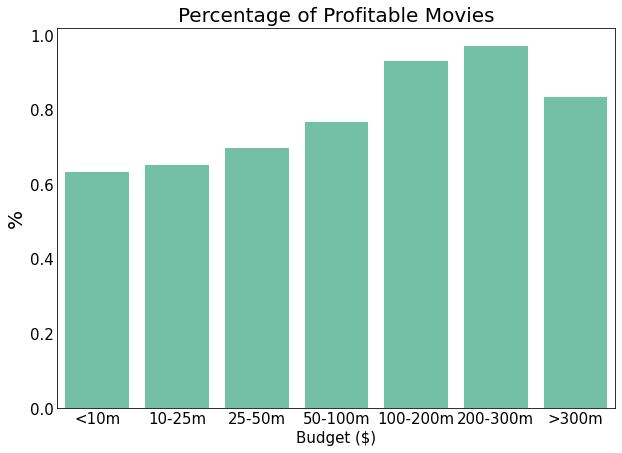

In [216]:
plt.figure(figsize = (10,7))
figure_5 = sns.barplot(y = 'p&l', x = 'budget_bin', data=budgets, color = 'mediumaquamarine', ci=False);
figure_5.set_xlabel('Budget ($)', fontsize=15)
figure_5.tick_params(labelsize=15, size=0)
figure_5.set_ylabel('%', fontsize=20)
figure_5.set_title('Percentage of Profitable Movies', fontsize=20);

In [217]:
budgets.groupby('month').mean().head(12)

,production_budget,domestic_gross,worldwide_gross,year,profit,roi,p&l
month,,,,,,,
April,25.039362,29.331189,64.174791,2004.938534,39.135429,3.047102,0.654846
August,26.620740,34.165803,64.733394,2003.117773,38.112654,4.711115,0.678801
December,41.533995,62.445651,136.209505,2000.803636,94.675510,3.291081,0.749091
February,29.710405,38.455800,77.644461,2003.914127,47.934056,3.931870,0.675900
January,22.114420,26.216143,50.845051,2002.826498,28.730631,3.569187,0.659306
July,44.725135,64.231580,149.005825,2003.540865,104.280690,5.357524,0.757212
June,45.454564,70.070158,151.577304,2001.582222,106.122739,7.391307,0.740000
March,33.226302,42.457385,88.509873,2004.758782,55.283571,3.884629,0.674473
May,49.725379,71.062998,172.163518,2003.018325,122.438140,4.644904,0.688482


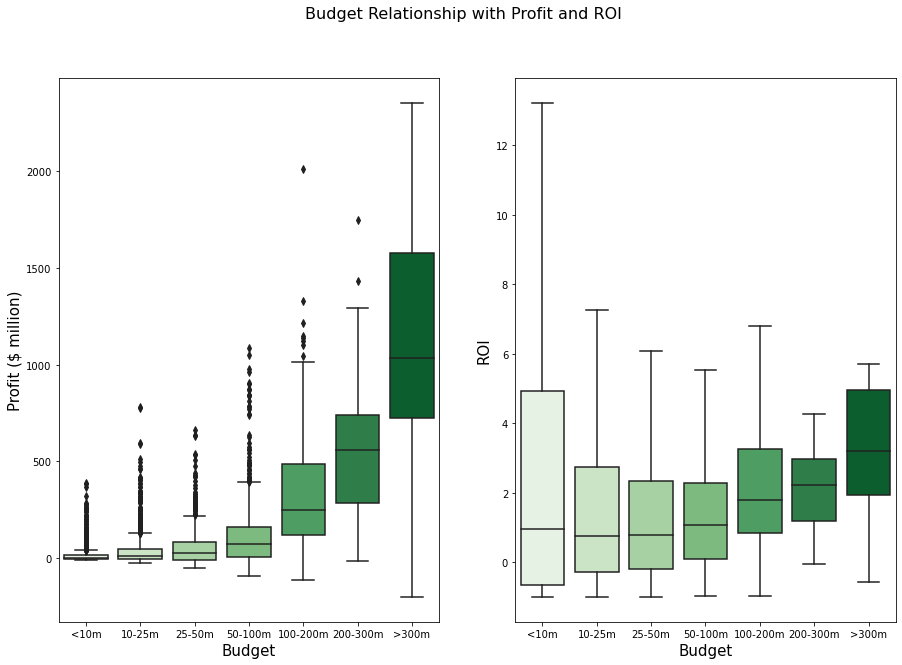

In [258]:
figure_7, axes = plt.subplots(1,2, figsize=(15,10))
figure_7.suptitle('Budget Relationship with Profit and ROI', fontsize=16)
axes[0] = sns.boxplot(x = 'budget_bin', y = 'profit', palette="Greens", data = budgets, ax=axes[0])
axes[1] = sns.boxplot(x = 'budget_bin', y = 'roi',palette="Greens", data = budgets, ax=axes[1], showfliers=False)
axes[1].set_ylabel('ROI', fontsize=15)
axes[0].set_ylabel('Profit ($ million)', fontsize=15)
axes[0].set_xlabel('Budget', fontsize = 15)
axes[1].set_xlabel('Budget', fontsize = 15);

The most profitable budget is over 300m however this also seems to open up the possibility of incurring a loss as is shown by the lower whisker. Between 100m and 300m still has potential for large returns and typically out performs lower budget ranges in terms of ROI, whilst spending more than this is still profitable more often than not as a company that is new to the business, I could not recommend spending more than $300m on the first movie.

## When should you release a movie?

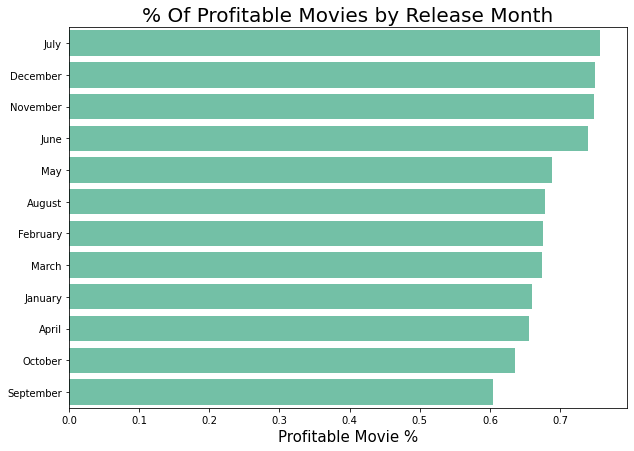

In [244]:
result = budgets.groupby('month').mean().reset_index().sort_values('p&l', ascending=False)
result.head(12)
plt.figure(figsize = (10,7))
figure_6 = sns.barplot(y = 'month', x = 'p&l', data=result.sort_values('p&l', ascending=False),\
                       color = 'mediumaquamarine');
figure_6.set_title('% Of Profitable Movies by Release Month', fontsize=20);
figure_6.set_ylabel('', fontsize=15)
figure_6.set_xlabel('Profitable Movie %', fontsize=15);

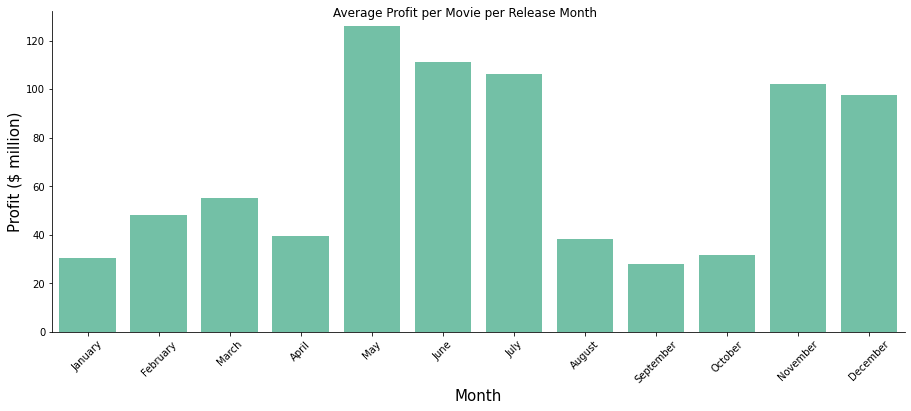

In [254]:
figure_7 = sns.catplot(x = 'month', y='profit', kind= 'bar', color='mediumaquamarine',\
                       data = budgets[budgets['year']>1980], aspect = 2.5, ci=None)
figure_7.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',\
                      'August', 'September', 'October', 'November', 'December'], rotation=45)
figure_7.set_xlabels('Month', fontsize=15)
figure_7.set_ylabels('Profit ($ million)', fontsize=15)
figure_7.fig.suptitle('Average Profit per Movie per Release Month');

Summer and the run up to Christmas are the best times to release a movie in terms of % movies that are profitable and also in terms of the average profit per movie. Perhaps an exploration of Genre could provide a more definitive release month. 

## What Genre(s) should Microsoft Target?

The next question to answer is the type of movie that Microsoft should make, there are many genres to choose from...

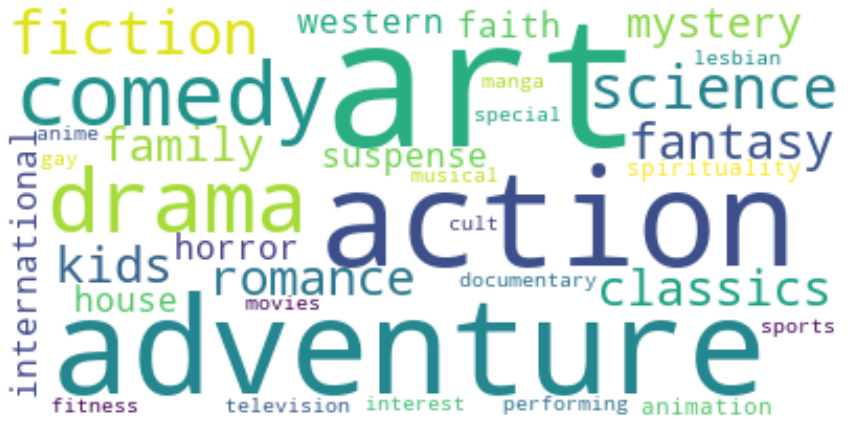

In [336]:
#import the prerequisites to generate word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize=[15,15])
# join the list and lowercase all the words
text = ' '.join(genres).lower()

#create the wordcloud object
wordcloud = WordCloud(collocations=True, background_color='white').generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show();

In [340]:
wordcloud.to_file("genres.png");

In [383]:
df_info(genres_df)

#################################################################################### 

genres_df Database


The length of this dataframe is 10095
Database shape (10095, 13)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 0 to 39648
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_title      10095 non-null  object        
 1   genre              10095 non-null  object        
 2   release_date       10095 non-null  datetime64[ns]
 3   movie              10095 non-null  object        
 4   production_budget  10095 non-null  float64       
 5   domestic_gross     10095 non-null  float64       
 6   worldwide_gross    10095 non-null  float64       
 7   month              10095 non-null  float64       
 8   year               10095 non-null  float64       
 9   profit             10095 non-null  float64       
 10  roi                10095 non-null  float64       
 

,primary_title,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
0,Percy Jackson & the Olympians: The Lightning T...,Action and Adventure,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
1,Percy Jackson & the Olympians: The Lightning T...,Comedy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
2,Percy Jackson & the Olympians: The Lightning T...,Drama,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction and Fantasy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
4,Please Give,Comedy,2010-04-30,Please Give,3.0,4.033574,4.570178,4.0,2010.0,1.570178,0.523393,<10m,1.0


Number of Null values in Genres_df


primary_title        0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
month                0
year                 0
profit               0
roi                  0
budget_bin           0
p&l                  0
dtype: int64

The Number of duplicated rows in genres_df is 562
#################################################################################### 



Profit and ROI are key for this analysis, therefore there is no value in imputing such a large number of missing values, insights wouldn't be accurate. Therefore I will remove rows that have null values in what were the 'budgets' dataframe columns


In [283]:
genres_df.dropna(subset=['release_date'], inplace=True)
df_info(genres_df)

#################################################################################### 

genres_df Database


The length of this dataframe is 18627
Database shape (18627, 18)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18627 entries, 60 to 293013
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_title      18627 non-null  object        
 1   genre              18627 non-null  object        
 2   tconst             18627 non-null  object        
 3   start_year         18627 non-null  int64         
 4   runtime_minutes    15820 non-null  float64       
 5   averagerating      11928 non-null  float64       
 6   numvotes           11928 non-null  float64       
 7   release_date       18627 non-null  datetime64[ns]
 8   movie              18627 non-null  object        
 9   production_budget  18627 non-null  float64       
 10  domestic_gross     18627 non-null  float64       

,primary_title,genre,tconst,start_year,runtime_minutes,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
60,Mortal Kombat,Action,tt0293429,2021,NaN,NaN,NaN,1995-08-18,Mortal Kombat,20.0,70.433227,122.133227,8.0,1995.0,102.133227,5.106661,10-25m,1.0
61,Mortal Kombat,Adventure,tt0293429,2021,NaN,NaN,NaN,1995-08-18,Mortal Kombat,20.0,70.433227,122.133227,8.0,1995.0,102.133227,5.106661,10-25m,1.0
62,Mortal Kombat,Fantasy,tt0293429,2021,NaN,NaN,NaN,1995-08-18,Mortal Kombat,20.0,70.433227,122.133227,8.0,1995.0,102.133227,5.106661,10-25m,1.0
92,On the Road,Adventure,tt0337692,2012,124.0,6.1,37886.0,2013-03-22,On the Road,25.0,0.720828,9.313302,3.0,2013.0,-15.686698,-0.627468,10-25m,0.0
93,On the Road,Adventure,tt2404548,2011,90.0,NaN,NaN,2013-03-22,On the Road,25.0,0.720828,9.313302,3.0,2013.0,-15.686698,-0.627468,10-25m,0.0


Number of Null values in Genres_df


primary_title           0
genre                   0
tconst                  0
start_year              0
runtime_minutes      2807
averagerating        6699
numvotes             6699
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
month                   0
year                    0
profit                  0
roi                     0
budget_bin              0
p&l                     0
dtype: int64

The Number of duplicated rows in genres_df is 6238
#################################################################################### 



There are still missing values in the ratings and runtime - that can be tackled later, I will focus on the relationship between genres and profit for now.

To remind ourselves of the values available to us in this dataframe I will use .describe() once again

In [307]:
genres_df[genres_df['start_year'] == genres_df['year']]

,primary_title,genre,tconst,start_year,runtime_minutes,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
94,On the Road,Adventure,tt3872966,2013,87.0,NaN,NaN,2013-03-22,On the Road,25.0,0.720828,9.313302,3.0,2013.0,-15.686698,-0.627468,10-25m,0.0
100,On the Road,Drama,tt3872966,2013,87.0,NaN,NaN,2013-03-22,On the Road,25.0,0.720828,9.313302,3.0,2013.0,-15.686698,-0.627468,10-25m,0.0
106,On the Road,Romance,tt3872966,2013,87.0,NaN,NaN,2013-03-22,On the Road,25.0,0.720828,9.313302,3.0,2013.0,-15.686698,-0.627468,10-25m,0.0
119,The Secret Life of Walter Mitty,Adventure,tt0359950,2013,114.0,7.3,275300.0,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183,12.0,2013.0,96.861183,1.064409,50-100m,1.0
120,The Secret Life of Walter Mitty,Comedy,tt0359950,2013,114.0,7.3,275300.0,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183,12.0,2013.0,96.861183,1.064409,50-100m,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292804,The Promise,Drama,tt4192918,2017,NaN,8.8,53.0,2017-04-21,The Promise,90.0,8.224288,10.551417,4.0,2017.0,-79.448583,-0.882762,50-100m,0.0
292811,The Promise,Drama,tt7232438,2017,114.0,6.1,629.0,2017-04-21,The Promise,90.0,8.224288,10.551417,4.0,2017.0,-79.448583,-0.882762,50-100m,0.0
292812,The Promise,Drama,tt9889072,2017,NaN,NaN,NaN,2017-04-21,The Promise,90.0,8.224288,10.551417,4.0,2017.0,-79.448583,-0.882762,50-100m,0.0
292941,Columbus,Comedy,tt5990474,2017,104.0,7.2,10735.0,2017-08-04,Columbus,0.7,1.017107,1.110511,8.0,2017.0,0.410511,0.586444,<10m,1.0


In [313]:
genres_df = rt_movies.set_index('movie_title').genres.str.split(',', expand=True).stack().reset_index('movie_title')
genres_df.columns=['primary_title', 'genre']
genres_df.head()

,primary_title,genre
0,Percy Jackson & the Olympians: The Lightning T...,Action & Adventure
1,Percy Jackson & the Olympians: The Lightning T...,Comedy
2,Percy Jackson & the Olympians: The Lightning T...,Drama
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction & Fantasy
0,Please Give,Comedy


In [314]:
genres_df = genres_df.merge(budgets, how='left', left_on='primary_title', right_on='movie')
genres_df.head()

,primary_title,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
0,Percy Jackson & the Olympians: The Lightning T...,Action & Adventure,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
1,Percy Jackson & the Olympians: The Lightning T...,Comedy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
2,Percy Jackson & the Olympians: The Lightning T...,Drama,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction & Fantasy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
4,Please Give,Comedy,2010-04-30,Please Give,3.0,4.033574,4.570178,4.0,2010.0,1.570178,0.523393,<10m,1.0


In [316]:
list_genres = list(genres_df.genre.unique())
list_genres

['Action & Adventure',
 ' Comedy',
 ' Drama',
 ' Science Fiction & Fantasy',
 'Comedy',
 ' Romance',
 'Classics',
 ' Kids & Family',
 ' Classics',
 ' Mystery & Suspense',
 ' Western',
 'Art House & International',
 ' Horror',
 'Drama',
 ' Faith & Spirituality',
 ' Animation',
 'Documentary',
 ' Special Interest',
 ' Documentary',
 'Animation',
 'Horror',
 ' Musical & Performing Arts',
 ' Sports & Fitness',
 ' Television',
 'Kids & Family',
 'Mystery & Suspense',
 ' Art House & International',
 'Romance',
 'Cult Movies',
 ' Cult Movies',
 'Science Fiction & Fantasy',
 'Musical & Performing Arts',
 ' Anime & Manga',
 ' Gay & Lesbian',
 'Western',
 'Special Interest',
 'Television']

In [321]:
genres_df['genre'] = genres_df['genre'].str.strip().str.replace('&', 'and')
list_genres = list(genres_df.genre.unique())
list_genres

['Action and Adventure',
 'Comedy',
 'Drama',
 'Science Fiction and Fantasy',
 'Romance',
 'Classics',
 'Kids and Family',
 'Mystery and Suspense',
 'Western',
 'Art House and International',
 'Horror',
 'Faith and Spirituality',
 'Animation',
 'Documentary',
 'Special Interest',
 'Musical and Performing Arts',
 'Sports and Fitness',
 'Television',
 'Cult Movies',
 'Anime and Manga',
 'Gay and Lesbian']

In [333]:
genres = []
for i in list_genres:
    for entry in i.split(' '):
        if entry != 'and':
            print(entry)
            genres.append(entry)
        else:
            continue

Action
Adventure
Comedy
Drama
Science
Fiction
Fantasy
Romance
Classics
Kids
Family
Mystery
Suspense
Western
Art
House
International
Horror
Faith
Spirituality
Animation
Documentary
Special
Interest
Musical
Performing
Arts
Sports
Fitness
Television
Cult
Movies
Anime
Manga
Gay
Lesbian


In [341]:
genres_df.describe()

,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,p&l
count,10095.000000,10095.000000,10095.000000,10095.000000,10095.00000,10095.000000,10095.000000,10095.000000
mean,41.126873,54.894091,122.241827,6.928876,2002.56424,81.114955,4.497767,0.720753
std,47.665314,77.796487,207.503723,3.422569,13.40801,175.618102,21.099776,0.448651
min,0.001100,0.000703,0.000703,1.000000,1915.00000,-200.237650,-0.999862,0.000000
25%,9.200000,7.423977,11.773384,4.000000,1999.00000,-0.981858,-0.118695,0.000000
50%,25.000000,29.580087,46.666955,7.000000,2005.00000,19.535492,1.035134,1.000000
75%,55.000000,67.631157,138.492394,10.000000,2011.00000,85.008658,3.027167,1.000000
max,425.000000,760.507625,2776.345279,12.000000,2019.00000,2351.345279,497.750000,1.000000


In [342]:
df_info(genres_df)

#################################################################################### 

genres_df Database


The length of this dataframe is 39658
Database shape (39658, 13)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39658 entries, 0 to 39657
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_title      39658 non-null  object        
 1   genre              39658 non-null  object        
 2   release_date       10095 non-null  datetime64[ns]
 3   movie              10095 non-null  object        
 4   production_budget  10095 non-null  float64       
 5   domestic_gross     10095 non-null  float64       
 6   worldwide_gross    10095 non-null  float64       
 7   month              10095 non-null  float64       
 8   year               10095 non-null  float64       
 9   profit             10095 non-null  float64       
 10  roi                10095 non-null  float64       
 

,primary_title,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
0,Percy Jackson & the Olympians: The Lightning T...,Action and Adventure,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
1,Percy Jackson & the Olympians: The Lightning T...,Comedy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
2,Percy Jackson & the Olympians: The Lightning T...,Drama,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction and Fantasy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
4,Please Give,Comedy,2010-04-30,Please Give,3.0,4.033574,4.570178,4.0,2010.0,1.570178,0.523393,<10m,1.0


Number of Null values in Genres_df


primary_title            0
genre                    0
release_date         29563
movie                29563
production_budget    29563
domestic_gross       29563
worldwide_gross      29563
month                29563
year                 29563
profit               29563
roi                  29563
budget_bin           29563
p&l                  29563
dtype: int64

The Number of duplicated rows in genres_df is 845
#################################################################################### 



In [343]:
genres_df.dropna(subset=['p&l'], inplace=True)
df_info(genres_df)

#################################################################################### 

genres_df Database


The length of this dataframe is 10095
Database shape (10095, 13)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 0 to 39648
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_title      10095 non-null  object        
 1   genre              10095 non-null  object        
 2   release_date       10095 non-null  datetime64[ns]
 3   movie              10095 non-null  object        
 4   production_budget  10095 non-null  float64       
 5   domestic_gross     10095 non-null  float64       
 6   worldwide_gross    10095 non-null  float64       
 7   month              10095 non-null  float64       
 8   year               10095 non-null  float64       
 9   profit             10095 non-null  float64       
 10  roi                10095 non-null  float64       
 

,primary_title,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,budget_bin,p&l
0,Percy Jackson & the Olympians: The Lightning T...,Action and Adventure,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
1,Percy Jackson & the Olympians: The Lightning T...,Comedy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
2,Percy Jackson & the Olympians: The Lightning T...,Drama,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction and Fantasy,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95.0,88.768303,223.050874,2.0,2010.0,128.050874,1.347904,50-100m,1.0
4,Please Give,Comedy,2010-04-30,Please Give,3.0,4.033574,4.570178,4.0,2010.0,1.570178,0.523393,<10m,1.0


Number of Null values in Genres_df


primary_title        0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
month                0
year                 0
profit               0
roi                  0
budget_bin           0
p&l                  0
dtype: int64

The Number of duplicated rows in genres_df is 562
#################################################################################### 



In [347]:
# new dataframe grouping median values by genre 
new_genre_df = genres_df[genres_df['year']>2009].groupby(['genre']).mean().sort_values('profit', ascending=False)
new_genre_df = new_genre_df.reset_index()
new_genre_df.head(25)

,genre,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi,p&l
0,Animation,104.217411,142.697327,394.560669,6.535714,2014.446429,290.343258,2.769358,0.910714
1,Kids and Family,105.518440,134.895436,369.422066,6.645390,2013.907801,263.903627,2.498333,0.907801
2,Cult Movies,41.833333,78.943991,300.932563,5.333333,2015.666667,259.099230,4.864375,1.000000
3,Science Fiction and Fantasy,101.098704,115.786831,326.210171,6.148148,2014.062963,225.111467,2.262852,0.848148
4,Television,55.800000,78.861047,239.590927,5.833333,2011.333333,183.790927,1.765261,0.666667
5,Action and Adventure,87.906049,95.714938,267.699549,6.362140,2014.026749,179.793500,1.736428,0.792181
6,Musical and Performing Arts,47.970408,85.486158,191.095841,7.591837,2013.469388,143.125433,2.927800,0.755102
7,Classics,71.386842,66.337238,183.445306,7.447368,2013.736842,112.058464,1.495379,0.710526
8,Sports and Fitness,38.750000,65.144939,138.017779,8.750000,2013.083333,99.267779,1.816153,0.666667
9,Comedy,39.687832,56.574637,130.086144,6.372470,2013.331984,90.398312,2.270454,0.783401


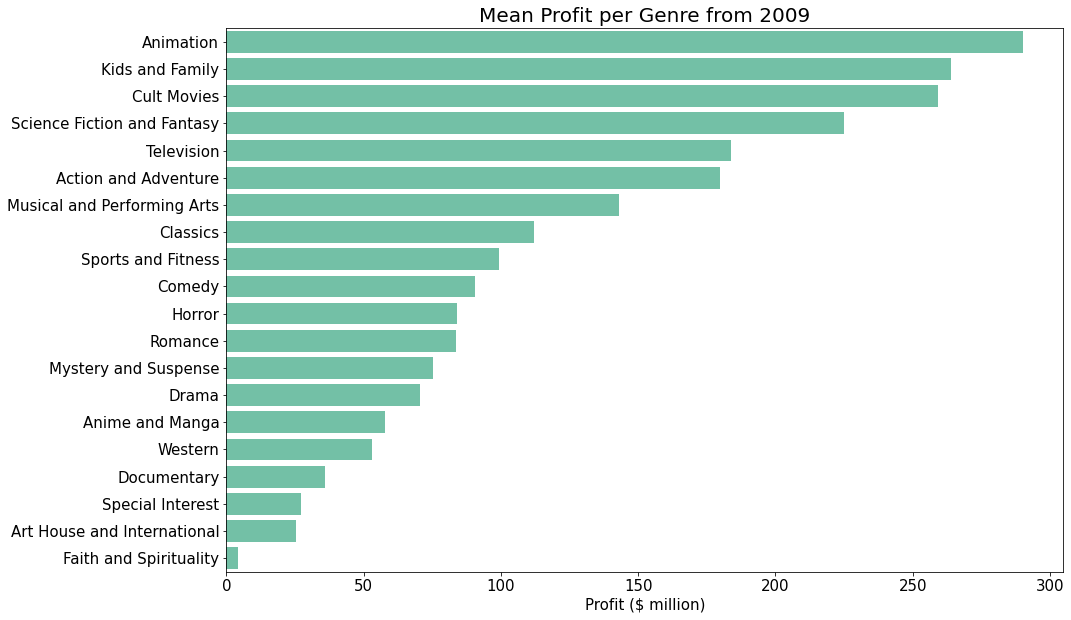

In [360]:
plt.figure(figsize = (15,10))
figure_7 = sns.barplot(y = 'genre', x = 'profit', data=new_genre_df, color = 'mediumaquamarine');
figure_7.set_title('Mean Profit per Genre from 2009', fontsize=20);
figure_7.tick_params(labelsize=15)
figure_7.set_ylabel('')
figure_7.set_xlabel('Profit ($ million)', fontsize=15);

Ok, so animation is a clear winner in terms of average profit per movie, I suspect kids and family overlaps with animation, a lot of movies are likely to be in both genres.

How do the genres look when we explore ROI?


Text(0.5, 0, '')

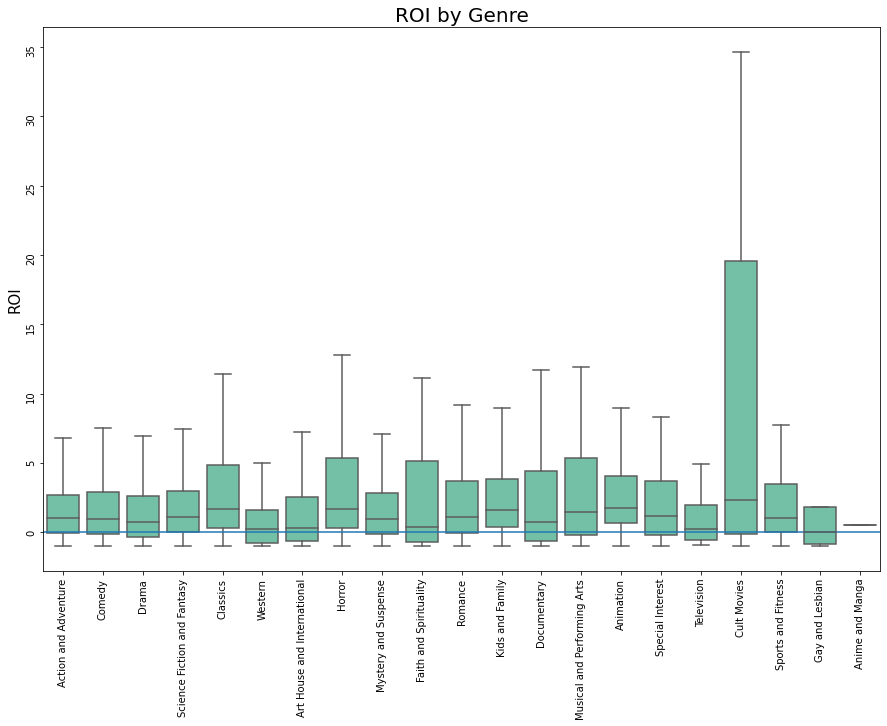

In [377]:
plt.figure(figsize = (15,10))
figure_8 = sns.boxplot(y='roi', x = 'genre', color='mediumaquamarine', data= genres_df, showfliers=False);
figure_8.set_title('ROI by Genre', fontsize = 20)
figure_8.tick_params(rotation=90)
figure_8.axhline()
figure_8.set_ylabel('ROI', fontsize=15)
figure_8.set_xlabel('')

The recipe for making a cult classic is not written in stone and depends on many factors - as such it is not a genre I will explore. 

This throws up some alternative suggestions to animation (which still performs strongly in ROI terms). Other genres that may be avenues to explore are Musicals and Horror. Faith and spirituality has a low median ROI value and its Lower quartile is below 0 making it more risky. One last thing to consider is the percentage of movies made in their respective genres that are profitable.

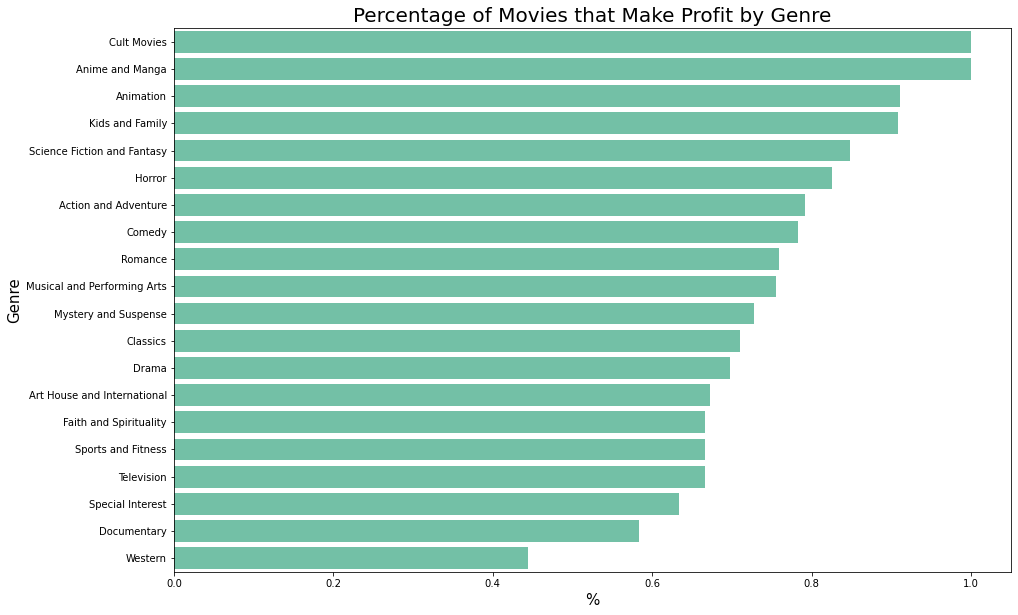

In [382]:
#profit_loss = genres_df[genres_df['year']>2009].groupby(['genre']).mean().sort_values('p&l', ascending=False).reset_index()
profit_loss.head()
plt.figure(figsize = (15,10))
figure_9 = sns.barplot(y = 'genre', x = 'p&l', data=profit_loss, color = 'mediumaquamarine');
figure_9.set_title('Percentage of Movies that Make Profit by Genre', fontsize=20);
figure_9.set_ylabel('Genre', fontsize=15)
figure_9.set_xlabel('%', fontsize=15);

Both Horror and Animation perform strongly in this metric too, therefore depending on the number of movies being made, the primary genre being recommended would be Animation. If Microsoft would like to spread their risk in multiple genres, Horror would be the second genre to prioritise.